# Variations of McCall Model

Last update: Oct 15th, 2020

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## 1. Correlated Wage Offers

We start with the original McCall Model. Instead of assuming i.i.d. wage offers (and put a probability distribution on them), we assume that the wage offers are correlated. Suppose the transition probabilities of the states follow a Markov chain

$$
P = \left[\begin{array}{ccccc}
\rho & 1-\rho\\
 & \frac{1-\rho}{2} & \rho & \frac{1-\rho}{2}\\
\\
\\
 &  &  & 1-\rho & \rho
\end{array}\right]
$$

How to formulate the value function?

In [3]:
# Preparations
n = 51
w_min, w_max = 10, 60
w_default = np.linspace(w_min, w_max, n)

In [6]:
c = 25       # Unemployment benefit
beta = 0.99  # Discount factor
rho = 0.8    # Persistence of wage offer

In [7]:
# Construct Markov chain
P = np.zeros((n, n))
for i in range(n):
    P[i, i] = rho
    if (i == 0):
        P[i, i + 1] = 1 - rho
    elif (i == (n - 1)):
        P[i, i - 1] = 1 - rho
    else:
        P[i, i - 1] = (1 - rho) / 2
        P[i, i + 1] = (1 - rho) / 2

## 2. On-the-job Search

Assume the currently unemployed agents will still receive a wage for free. However, for currently employed agents, they can choose to pay a cost $s$ to draw a wage offer again at the beginning of every period. They can choose to stay on their current job, or switch to the new job they find.

In [11]:
# Preparations and parameterization
n, a, b = 51, 200, 100                        # default parameters
q_default = stats.betabinom(n, a, b).pmf      # probability mass function

In [12]:
w_min, w_max = 10, 60
w_default = np.linspace(w_min, w_max, n)
q_grid = q_default(w_default)

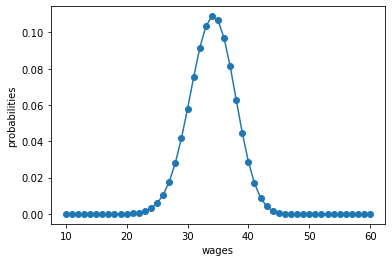

In [13]:
fig, ax = plt.subplots()
ax.plot(w_default, q_grid, '-o')
ax.set_xlabel('wages')
ax.set_ylabel('probabilities')

plt.show()

In [14]:
c = 25       # Unemployment benefit
beta = 0.99  # Discount factor
s = 40       # On-the-job search cost